In [6]:
from __future__ import division, print_function

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pandas as pd
import datetime
import glob

import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
from matplotlib import rcParams
rcParams['text.usetex'] = True

%matplotlib inline

In [10]:
#Define the range of year over which data where acquired
i_init=2003
i_final=2013


# Getting back the objects:
import pickle

for i in xrange(i_init, i_final+1,1):
    k=i-i_init
    globals()['yr%s' %k]=i

fp2=open('CandaBasinWHOI-CTDdata.pickle','rb')
[globals()['longitude%s' %yr0],globals()['longitude%s' %yr1],globals()['longitude%s' %yr2],
 globals()['longitude%s' %yr3],globals()['longitude%s' %yr4],globals()['longitude%s' %yr5],
 globals()['longitude%s' %yr6],globals()['longitude%s' %yr7],globals()['longitude%s' %yr8],
 globals()['longitude%s' %yr9],globals()['longitude%s' %yr10],
 globals()['latitude%s' %yr0],globals()['latitude%s' %yr1],globals()['latitude%s' %yr2],
 globals()['latitude%s' %yr3],globals()['latitude%s' %yr4],globals()['latitude%s' %yr5],
 globals()['latitude%s' %yr6],globals()['latitude%s' %yr7],globals()['latitude%s' %yr8],
 globals()['latitude%s' %yr9],globals()['latitude%s' %yr10],
 globals()['time%s' %yr0],globals()['time%s' %yr1],globals()['time%s' %yr2],
 globals()['time%s' %yr3],globals()['time%s' %yr4],globals()['time%s' %yr5],
 globals()['time%s' %yr6],globals()['time%s' %yr7],globals()['time%s' %yr8],
 globals()['time%s' %yr9],globals()['time%s' %yr10],
 globals()['p%s' %yr0],globals()['p%s' %yr1],globals()['p%s' %yr2],globals()['p%s' %yr3],
 globals()['p%s' %yr4],globals()['p%s' %yr5],globals()['p%s' %yr6],globals()['p%s' %yr7],
 globals()['p%s' %yr8],globals()['p%s' %yr9],globals()['p%s' %yr10],
 globals()['T%s' %yr0],globals()['T%s' %yr1],globals()['T%s' %yr2],globals()['T%s' %yr3],
 globals()['T%s' %yr4],globals()['T%s' %yr5],globals()['T%s' %yr6],globals()['T%s' %yr7],
 globals()['T%s' %yr8],globals()['T%s' %yr9],globals()['T%s' %yr10],
 globals()['S%s' %yr0],globals()['S%s' %yr1],globals()['S%s' %yr2],globals()['S%s' %yr3],
 globals()['S%s' %yr4],globals()['S%s' %yr5],globals()['S%s' %yr6],globals()['S%s' %yr7],
 globals()['S%s' %yr8],globals()['S%s' %yr9],globals()['S%s' %yr10],
 globals()['theta%s' %yr0],globals()['theta%s' %yr1],globals()['theta%s' %yr2],globals()['theta%s' %yr3],
 globals()['theta%s' %yr4],globals()['theta%s' %yr5],globals()['theta%s' %yr6],globals()['theta%s' %yr7],
 globals()['theta%s' %yr8],globals()['theta%s' %yr9],globals()['theta%s' %yr10],
 globals()['dens%s' %yr0],globals()['dens%s' %yr1],globals()['dens%s' %yr2],globals()['dens%s' %yr3],
 globals()['dens%s' %yr4],globals()['dens%s' %yr5],globals()['dens%s' %yr6],globals()['dens%s' %yr7],
 globals()['dens%s' %yr8],globals()['dens%s' %yr9],globals()['dens%s' %yr10]] = pickle.load(fp2)




25


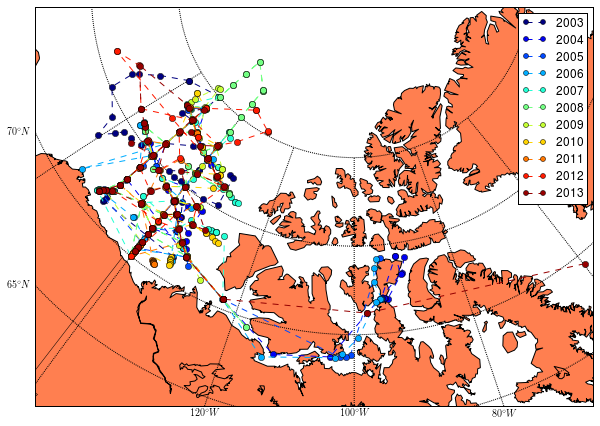

In [12]:
### Draw the map for the location of the stations

#m = Basemap(llcrnrlon=-170, llcrnrlat=65, urcrnrlon=-50, urcrnrlat=85,lon_0=-100, resolution='l',area_thresh=10,projection='merc')
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(10,10))
x=100000
m = Basemap(llcrnrx=-20*x, llcrnry=-10*x, urcrnrx=+15*x, urcrnry=+15*x,lon_0=-100, lat_0=75,projection='ortho',resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='coral')

m.drawmeridians(np.arange(-160,-50,20), labels=[0,0,0,1])
m.drawparallels(np.arange(65,85,5), labels=[1,0,0,0])

cmap = plt.get_cmap('jet')


coef=int(255/(i_final-i_init))
print(coef)

legend=list(np.chararray((i_final-i_init+1)))
for i in xrange(i_init,i_final+1,1):
    globals()['l%s' %i]='a'
    legend[i-i_init]=globals()['l%s' %i]

for i in xrange(i_init,i_final+1,1):
    xs,ys= m(globals()['longitude%s' %i],globals()['latitude%s' %i])
    plt.plot(xs,ys,'o--',color=cmap((i-2003)*coef),label=i)
    globals()['l%s' % i] = mlines.Line2D([], [],linestyle='--',marker='o',color=cmap((i-2003)*coef),markersize=5, label=i)
    legend[i-i_init]=globals()['l%s' % i]
    #print(legend)
lgd=plt.legend(handles=legend,loc=1)
frame = lgd.get_frame()
frame.set_facecolor('1.0')


2004     -89.6618333333     1.0     226.0
2004     -90.639     1.0     340.0
2004     -93.909     2.0     79.0
2004     -94.3965     1.0     58.0
2004     -94.5763333333     2.0     98.0
2004     -94.8743333333     1.0     216.0
2004     -95.2326666667     7.0     107.0
2004     -95.1916666667     1.0     248.0
2004     -95.06     2.0     400.0
2004     -91.4251666667     3.0     323.0
2004     -91.4118333333     1.0     300.0
2004     -90.8576666667     1.0     302.0
2005     -94.611     1.0     207.0
2006     -95.3838333333     2.0     207.0
2006     -96.0846666667     2.0     236.0
2006     -96.2071666667     6.0     346.0
2006     -95.0211666667     3.0     194.0
2006     -95.2565     3.0     129.0
2006     -96.0138333333     2.0     423.0
2013     -97.7931666667     1.0     101.0
2013     -97.7931666667     1.0     101.0


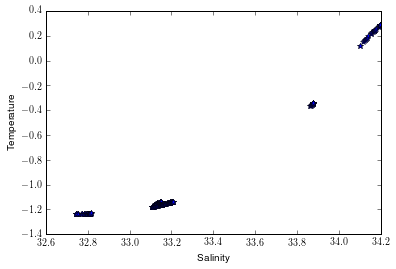

In [65]:
#print(longitude2006,latitude2006,longitude2006.shape)
i=0
for yr in xrange(i_init,i_final+1,1):
    li = len(globals()['latitude%s' %yr])

    #print(li)
    
    for i in xrange(0,li-1,1):
        lj = len(globals()['p%s' %yr][i,:])
        #print(yr, globals()['latitude%s' %yr][i],'   ', globals()['longitude%s' %yr][i])
 
        if (globals()['latitude%s' %yr][i] > 70 and globals()['latitude%s' %yr][i] < 75
            and globals()['longitude%s' %yr][i] > -100 and globals()['longitude%s' %yr][i] < -80):
            
            print(yr, '   ', globals()['longitude%s' %yr][i], '   ', min(globals()['p%s' %yr][i,:]),'   ',
                  max(globals()['p%s' %yr][i,:]))

            for j in xrange(0, lj-1, 1):
                if (globals()['p%s' %yr][i,j] > 300.0 and globals()['p%s' %yr][i,j] < 800.0): 
                    ax1 = plt.axes()

                    ax1.plot(globals()['S%s' %yr][i,j],globals()['T%s' %yr][i,j],'b*')    
                    ax1.set_xlabel('Salinity')
                    ax1.set_ylabel('Temperature')
    
plt.show()


2004     -103.763     1.0     100.0
2005     -100.5565     1.0     39.0
2005     -101.237     2.0     103.0
2005     -102.23     2.0     100.0
2006     -101.866833333     1.0     52.0
2006     -103.006666667     1.0     113.0


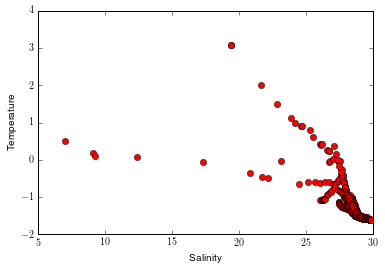

In [66]:
#print(longitude2006,latitude2006,longitude2006.shape)
i=0
for yr in xrange(i_init,i_final+1,1):
    li = len(globals()['latitude%s' %yr])

    #print(li)
    
    for i in xrange(0,li-1,1):
        lj = len(globals()['p%s' %yr][i,:])
        #print(yr, globals()['latitude%s' %yr][i],'   ', globals()['longitude%s' %yr][i])
 
        if (globals()['latitude%s' %yr][i] > 65 and globals()['latitude%s' %yr][i] < 70 
            and globals()['longitude%s' %yr][i] > -110 and globals()['longitude%s' %yr][i] < -100):
            
            print(yr,'   ', globals()['longitude%s' %yr][i], '   ', min(globals()['p%s' %yr][i,:]),'   ',
                  max(globals()['p%s' %yr][i,:]))

            for j in xrange(0, lj-1, 1):
                if (globals()['p%s' %yr][i,j] > 0.0 and globals()['p%s' %yr][i,j] < 300.0):
                    ax1 = plt.axes()

                    ax1.plot(globals()['S%s' %yr][i,j],globals()['T%s' %yr][i,j],'ro')    
                    ax1.set_xlabel('Salinity')
                    ax1.set_ylabel('Temperature')
    
plt.show()

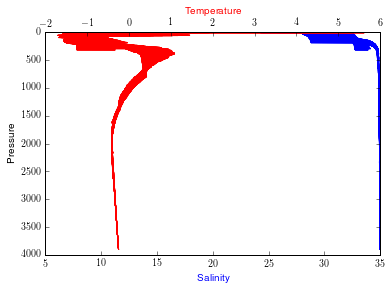

In [9]:
ax1 = plt.axes()#[0.08,0.1,0.25,0.4])
ax1.invert_yaxis()  

ax1.plot(S2004,p2004,'b')    
ax1.set_xlabel('Salinity')
ax1.xaxis.label.set_color('b')
ax1.set_ylabel('Pressure')
ax2 = ax1.twiny()
ax2.plot(T2004,p2004,'r')
ax2.set_xlabel('Temperature')
ax2.xaxis.label.set_color('r')

    
plt.show()

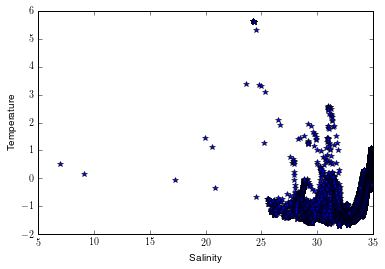

In [13]:
ax1 = plt.axes()

ax1.plot(S2004,T2004,'b*')    
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature')
    
plt.show()